In [137]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### NYTimes Data

In [203]:
data_nytimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32815 entries, 0 to 33250
Data columns (total 7 columns):
date            32815 non-null datetime64[ns]
county          32815 non-null object
state           32815 non-null object
fips            32764 non-null float64
cases           32815 non-null int64
deaths          32815 non-null int64
county_state    32815 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [204]:
data_nytimes['date'] = pd.to_datetime(data_nytimes['date'])
data_nytimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32815 entries, 0 to 33250
Data columns (total 7 columns):
date            32815 non-null datetime64[ns]
county          32815 non-null object
state           32815 non-null object
fips            32764 non-null float64
cases           32815 non-null int64
deaths          32815 non-null int64
county_state    32815 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [205]:
# concate county and state since some counties have the same name
data_nytimes['county_state'] = data_nytimes.county + ', ' + data_nytimes.state
data_nytimes.head()

date     county       state     fips  cases  deaths  \
0 2020-01-21  Snohomish  Washington  53061.0      1       0   
1 2020-01-22  Snohomish  Washington  53061.0      1       0   
2 2020-01-23  Snohomish  Washington  53061.0      1       0   
3 2020-01-24       Cook    Illinois  17031.0      1       0   
4 2020-01-24  Snohomish  Washington  53061.0      1       0   

            county_state  
0  Snohomish, Washington  
1  Snohomish, Washington  
2  Snohomish, Washington  
3         Cook, Illinois  
4  Snohomish, Washington

In [206]:
# sort data for shift later and calculate daily new cases and daily new deaths
df = data_nytimes.sort_values(by=['county_state', 'date'])

df['yesterday_cases'] = df.groupby(['county_state'])['cases'].shift(1)
df['yesterday_cases'].fillna(value = 0, inplace = True)
df['new_cases'] = df['cases'] - df['yesterday_cases']

df['yesterday_deaths'] = df.groupby(['county_state'])['deaths'].shift(1)
df['yesterday_deaths'].fillna(value = 0, inplace = True)
df['new_deaths'] = df['deaths'] - df['yesterday_deaths']
df.head()

date     county           state     fips  cases  deaths  \
5000 2020-03-19  Abbeville  South Carolina  45001.0      1       0   
5873 2020-03-20  Abbeville  South Carolina  45001.0      1       0   
6877 2020-03-21  Abbeville  South Carolina  45001.0      1       0   
7997 2020-03-22  Abbeville  South Carolina  45001.0      1       0   
9209 2020-03-23  Abbeville  South Carolina  45001.0      1       0   

                   county_state  yesterday_cases  new_cases  yesterday_deaths  \
5000  Abbeville, South Carolina              0.0        1.0               0.0   
5873  Abbeville, South Carolina              1.0        0.0               0.0   
6877  Abbeville, South Carolina              1.0        0.0               0.0   
7997  Abbeville, South Carolina              1.0        0.0               0.0   
9209  Abbeville, South Carolina              1.0        0.0               0.0   

      new_deaths  
5000         0.0  
5873         0.0  
6877         0.0  
7997         0.0  
9209         0.0

In [207]:
# time series data
df_total = df.groupby('date').sum()
df_total.head()

fips  cases  deaths  yesterday_cases  new_cases  \
date                                                             
2020-01-21  53061.0      1       0              0.0        1.0   
2020-01-22  53061.0      1       0              1.0        0.0   
2020-01-23  53061.0      1       0              1.0        0.0   
2020-01-24  70092.0      2       0              1.0        1.0   
2020-01-25  76151.0      3       0              2.0        1.0   

            yesterday_deaths  new_deaths  
date                                      
2020-01-21               0.0         0.0  
2020-01-22               0.0         0.0  
2020-01-23               0.0         0.0  
2020-01-24               0.0         0.0  
2020-01-25               0.0         0.0

In [214]:
# Mortality rate
df_total['mortality'] = df_total['deaths']/df_total['cases']
df_total.head()

fips  cases  deaths  yesterday_cases  new_cases  \
date                                                             
2020-01-21  53061.0      1       0              0.0        1.0   
2020-01-22  53061.0      1       0              1.0        0.0   
2020-01-23  53061.0      1       0              1.0        0.0   
2020-01-24  70092.0      2       0              1.0        1.0   
2020-01-25  76151.0      3       0              2.0        1.0   

            yesterday_deaths  new_deaths  mortality  
date                                                 
2020-01-21               0.0         0.0        0.0  
2020-01-22               0.0         0.0        0.0  
2020-01-23               0.0         0.0        0.0  
2020-01-24               0.0         0.0        0.0  
2020-01-25               0.0         0.0        0.0

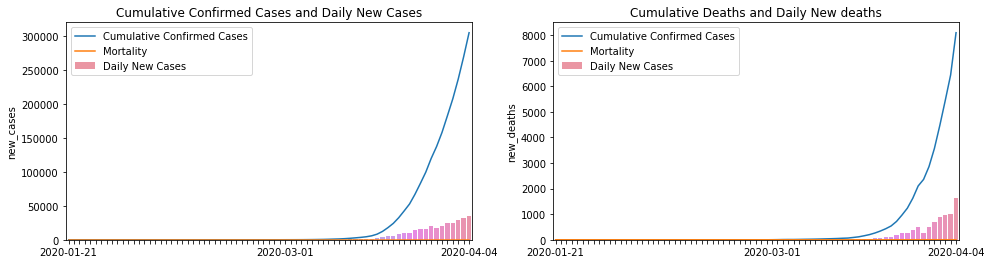

In [231]:
# plot overall cumulative cases and daily new case

fig, axes = plt.subplots(1,2, figsize=(16,4))
# confirmed cases
sns.lineplot(range(len(df_total.index)), df_total.cases, ax = axes[0], label = 'Cumulative Confirmed Cases')
sns.lineplot(range(len(df_total.index)), df_total.mortality, ax = axes[0], label = 'Mortality')
sns.barplot(list(range(len(df_total.index))), df_total.new_cases, ax = axes[0], label = 'Daily New Cases')
axes[0].set_title('Cumulative Confirmed Cases and Daily New Cases')


# labels for xticks
labels = ['2020-01-21']
labels += len(pd.date_range('2020-01-22', '2020-02-29')) * [''] 
labels += ['2020-03-01']
labels += len(pd.date_range('2020-03-02', '2020-04-03')) * [''] 
labels += ['2020-04-04']
axes[0].set_xticklabels(labels)
axes[0].legend()
#axes[0].set_yscale('log')

# death
sns.lineplot(range(len(df_total.index)), df_total.deaths, ax = axes[1], label = 'Cumulative Confirmed Cases')
sns.lineplot(range(len(df_total.index)), df_total.mortality, ax = axes[1], label = 'Mortality')
sns.barplot(list(range(len(df_total.index))), df_total.new_deaths, ax = axes[1], label = 'Daily New Cases')
axes[1].set_title('Cumulative Deaths and Daily New deaths')
axes[1].set_xticklabels(labels)
axes[1].legend();

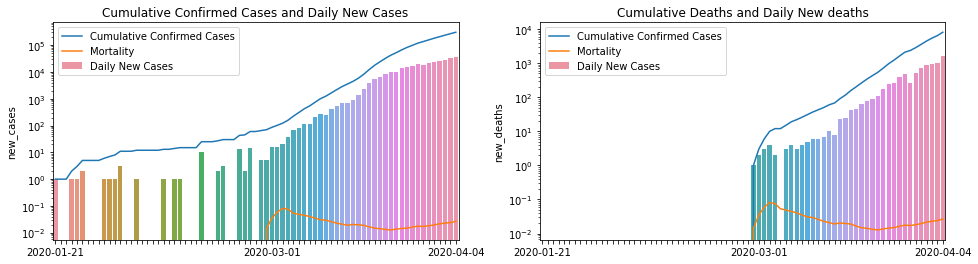

In [236]:
# log scale on y-axis

fig, axes = plt.subplots(1,2, figsize=(16,4))
# confirmed cases
sns.lineplot(range(len(df_total.index)), df_total.cases, ax = axes[0], label = 'Cumulative Confirmed Cases')
sns.lineplot(range(len(df_total.index)), df_total.mortality, ax = axes[0], label = 'Mortality')
sns.barplot(list(range(len(df_total.index))), df_total.new_cases, ax = axes[0], label = 'Daily New Cases')
axes[0].set_title('Cumulative Confirmed Cases and Daily New Cases')

# labels for xticks
labels = ['2020-01-21']
labels += len(pd.date_range('2020-01-22', '2020-02-29')) * [''] 
labels += ['2020-03-01']
labels += len(pd.date_range('2020-03-02', '2020-04-03')) * [''] 
labels += ['2020-04-04']
axes[0].set_xticklabels(labels)
#axes[0].set_ylim(bottom=0.1)
axes[0].set_yscale('log')
axes[0].legend()

# death
sns.lineplot(range(len(df_total.index)), df_total.deaths, ax = axes[1], label = 'Cumulative Confirmed Cases')
sns.lineplot(range(len(df_total.index)), df_total.mortality, ax = axes[1], label = 'Mortality')
sns.barplot(list(range(len(df_total.index))), df_total.new_deaths, ax = axes[1], label = 'Daily New Cases')
axes[1].set_title('Cumulative Deaths and Daily New deaths')
axes[1].set_xticklabels(labels)

axes[1].set_yscale('log')
axes[1].legend();

In [237]:
# find top n counties with largest cumulative cases
top_n = 10

# drop logs where county is Unknown
data_nytimes = data_nytimes[data_nytimes.county != 'Unknown']

counties = data_nytimes.groupby('county_state').sum().cases.nlargest(top_n).index.tolist()

In [238]:
counties

['New York City, New York',
 'Westchester, New York',
 'Nassau, New York',
 'Suffolk, New York',
 'Cook, Illinois',
 'Wayne, Michigan',
 'Bergen, New Jersey',
 'King, Washington',
 'Los Angeles, California',
 'Rockland, New York']

In [240]:
data = data_nytimes[data_nytimes['county_state'].isin(counties)]
data.tail()

date         county       state     fips  cases  deaths  \
32268 2020-04-04  New York City    New York      NaN  63307    2254   
32281 2020-04-04       Rockland    New York  36087.0   4872      69   
32289 2020-04-04        Suffolk    New York  36103.0  12328     175   
32298 2020-04-04    Westchester    New York  36119.0  13080     197   
33124 2020-04-04           King  Washington  53033.0   2900     204   

                  county_state  
32268  New York City, New York  
32281       Rockland, New York  
32289        Suffolk, New York  
32298    Westchester, New York  
33124         King, Washington

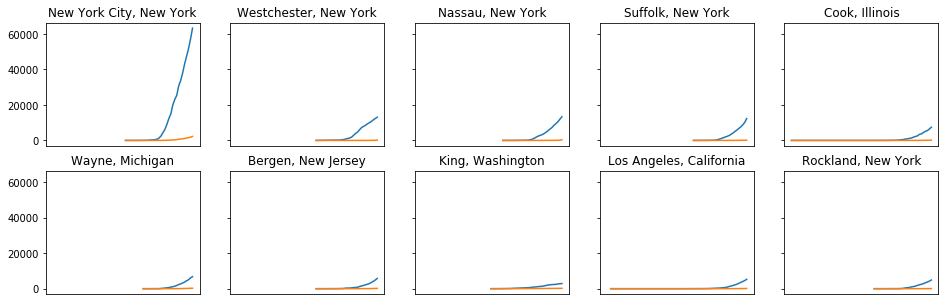

In [241]:
# initial plot
fig, axes = plt.subplots(2,5, figsize = (16,5), sharex=True, sharey=True, subplot_kw={ 'xticks': []})

for county, ax in zip(counties,axes.flat):
    data_per_county = data[data['county_state'] == county]
    ax.plot(data_per_county.date, data_per_county.cases)
    ax.plot(data_per_county.date, data_per_county.deaths)
    ax.set_title(county)

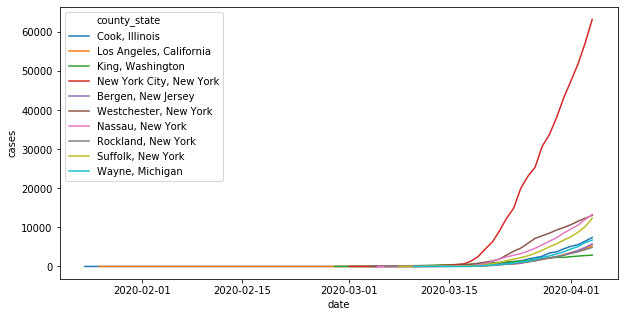

In [242]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(data_per_county.date, data_per_county.cases)
sns.lineplot(data=data, x='date', y='cases', hue='county_state');

In [243]:
# data only after 2020-03-01
data_halftime = data[(data['date'] > '2020-03-01')]


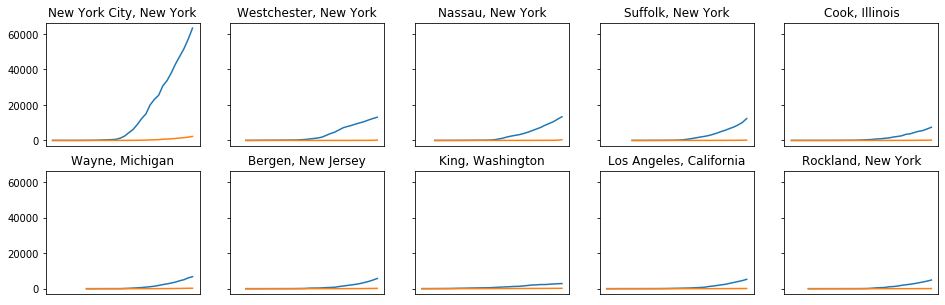

In [244]:
fig, axes = plt.subplots(2,5, figsize = (16,5), sharex=True, sharey=True, subplot_kw={ 'xticks': []})

for county, ax in zip(counties,axes.flat):
    data_per_county = data_halftime [data_halftime ['county_state'] == county]
    ax.plot(data_per_county.date, data_per_county.cases)
    ax.plot(data_per_county.date, data_per_county.deaths)
    ax.set_title(county)

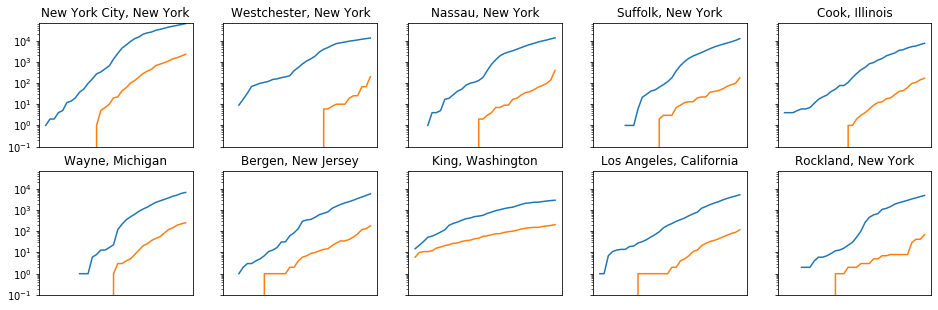

In [245]:
# log y-axis
fig, axes = plt.subplots(2,5, figsize = (16,5), sharex=True, sharey=True, subplot_kw={ 'xticks': []})

for county, ax in zip(counties,axes.flat):
    data_per_county = data_halftime [data_halftime ['county_state'] == county]
    ax.plot(data_per_county.date, data_per_county.cases)
    ax.plot(data_per_county.date, data_per_county.deaths)
    ax.set_title(county)
    ax.set_ylim(bottom=0.1)
    ax.set_yscale('log')

In [246]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(data_per_county.date, data_per_county.cases)
sns.lineplot(data=data_halftime, x='date', y='cases', hue='county_state')

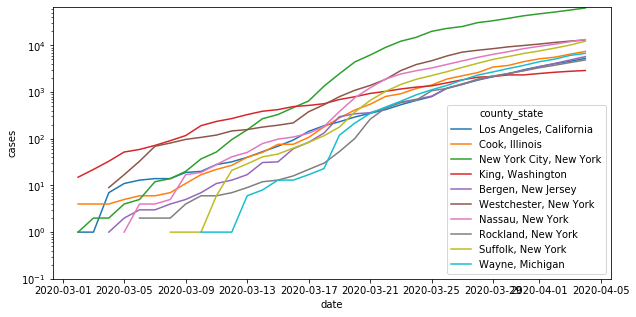

In [124]:
fig, ax = plt.subplots(figsize = (10,5))
#ax.plot(data_per_county.date, data_per_county.cases)
sns.lineplot(data=data_halftime, x='date', y='cases', hue='county_state')
ax.set_ylim(bottom=0.1)
ax.set_yscale('log');

In [ ]:
# increase rate

### JHU Data

In [22]:
data_jhu = pd.read_csv('../data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
data_jhu.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  \
0 -14.2710 -170.1320  ...       0        0        0        0        0       0   
1  13.4443  144.7937  ...      51       55       56       58       69      77   
2  15.0979  145.6739  ...       0        0        0        0        2       6   
3  18.2208  -66.5901  ...      79      100      127      174      239     286   
4  18.3358  -64.8963  ...      19       22        0        0       30      30   

   4/2/20  4/3/20  4/4/20  4/5/20  
0       0       0       0       0  
1      82      84      93     112  
2       6       6       6       6  
3     316     316     452     475  
4      30      37      40      42  

[5 rows x 86 columns]

In [23]:
data_jhu.shape

(3253, 86)

In [24]:
# top 10 counties with largest confirmed cases on 4/5/20
top10_index = data_jhu['4/5/20'].nlargest(10).index.tolist()

In [25]:
data_top10 = data_jhu.iloc[top10_index]
data_top10

UID iso2 iso3  code3     FIPS       Admin2 Province_State  \
1863  84036061   US  USA    840  36061.0     New York       New York   
1862  84036059   US  USA    840  36059.0       Nassau       New York   
1892  84036119   US  USA    840  36119.0  Westchester       New York   
1884  84036103   US  USA    840  36103.0      Suffolk       New York   
615   84017031   US  USA    840  17031.0         Cook       Illinois   
1317  84026163   US  USA    840  26163.0        Wayne       Michigan   
1780  84034003   US  USA    840  34003.0       Bergen     New Jersey   
209   84006037   US  USA    840   6037.0  Los Angeles     California   
1876  84036087   US  USA    840  36087.0     Rockland       New York   
367   84012086   US  USA    840  12086.0   Miami-Dade        Florida   

     Country_Region        Lat       Long_  ... 3/27/20  3/28/20  3/29/20  \
1863             US  40.767273  -73.971526  ...   25573    29776    33768   
1862             US  40.740665  -73.589419  ...    4657     5537     6445   
1892             US  41.162784  -73.757417  ...    7187     7875     8519   
1884             US  40.883201  -72.801217  ...    3385     4138     5023   
615              US  41.841448  -87.816588  ...    2239     2613     3445   
1317             US  42.280984  -83.281255  ...    1810     2316     2704   
1780             US  40.960109  -74.071643  ...    1505     1838     2169   
209              US  34.308284 -118.228241  ...    1465     1465     1829   
1876             US  41.150279  -74.025605  ...    1457     1896     2209   
367              US  25.611236  -80.551706  ...     763     1003     1192   

      3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  
1863    37453    43119   47439   51809   57159   63306   67551  
1862     7344     8544    9554   10587   12024   13346   14398  
1892     9326     9967   10683   11567   12351   13081   13723  
1884     5791     6713    7605    8746   10154   11370   13129  
615      3727     4496    5152    5575    6111    7439    8034  
1317     3195     3735    4470    5069    6096    6762    7518  
1780     2482     2909    3494    4099    4866    5760    6187  
209      2474     3019    3518    4045    4566    4605    5955  
1876     2511     2863    3321    3751    4289    4872    5326  
367      1632     2123    2202    2886    3364    3890    4146  

[10 rows x 86 columns]

In [26]:
# drop unnecessary columns
data_top10_cases = data_top10.drop(['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key'], axis = 1)

# add new column with combined county and state
data_top10_cases['county_state'] = data_top10_cases.Admin2 + ', ' + data_top10_cases.Province_State

data_top10_cases = data_top10_cases.drop(['Admin2','Province_State'],axis=1)
data_top10_cases.head()

#data_top10.pivot(columns = 'Admin2')

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
1863        0        0        0        0        0        0        0        0   
1862        0        0        0        0        0        0        0        0   
1892        0        0        0        0        0        0        0        0   
1884        0        0        0        0        0        0        0        0   
615         0        0        1        1        1        1        1        1   

      1/30/20  1/31/20  ...  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  \
1863        0        0  ...    29776    33768    37453    43119   47439   
1862        0        0  ...     5537     6445     7344     8544    9554   
1892        0        0  ...     7875     8519     9326     9967   10683   
1884        0        0  ...     4138     5023     5791     6713    7605   
615         1        2  ...     2613     3445     3727     4496    5152   

      4/2/20  4/3/20  4/4/20  4/5/20           county_state  
1863   51809   57159   63306   67551     New York, New York  
1862   10587   12024   13346   14398       Nassau, New York  
1892   11567   12351   13081   13723  Westchester, New York  
1884    8746   10154   11370   13129      Suffolk, New York  
615     5575    6111    7439    8034         Cook, Illinois  

[5 rows x 76 columns]

In [27]:
# reshape data
d = data_top10_cases.melt(id_vars=['county_state'], 
        var_name="date")
        #value_name="Value")
d.tail()

county_state    date  value
745          Wayne, Michigan  4/5/20   7518
746       Bergen, New Jersey  4/5/20   6187
747  Los Angeles, California  4/5/20   5955
748       Rockland, New York  4/5/20   5326
749      Miami-Dade, Florida  4/5/20   4146